In [21]:
# in this chapter we will better understand how basic ml algorithms work.

In [ ]:
# the cost function refers to the MSE

In [2]:
# Linear Regression
import numpy as np

In [6]:
# lets generate some random function
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)


<function matplotlib.pyplot.show(*args, **kw)>

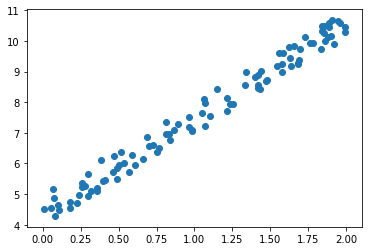

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show

In [8]:
# the normal equation
# theta_hat = (X^T X)^-1 X^T y
# theta_hat is the value of theta that minimizes the cost function

In [9]:
# we can use numpy to do matrix manipulation
X_b = np.c_[np.ones((100, 1)), X] # c_ stacks into 2d array, we need 1's because we want a theta_zero term
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_hat

array([[4.30316677],
       [3.15097718]])

In [12]:
# we can now make predictions using theta_hat
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_hat)
y_predict

array([[ 4.30316677],
       [10.60512114]])

<function matplotlib.pyplot.show(*args, **kw)>

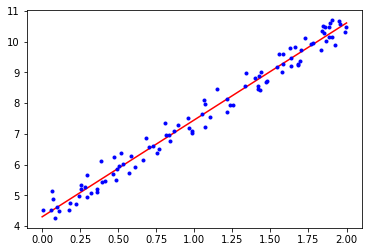

In [13]:
# lets visualise the prediction
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show

In [17]:
# we can do lin reg using scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # intercept if theta_0 like usual lin relationship equation

(array([4.30316677]), array([[3.15097718]]))

In [18]:
lin_reg.predict(X_new)

array([[ 4.30316677],
       [10.60512114]])

In [19]:
# sklearn is a very fast and easy to learn lin reg module

In [31]:
# the next method is better suited for lagre data sets as sklearns linreg class is on O(n^2)
# **batched** gradient Descent
# main concept is to tweek parameters iteratively in order to minimise cost function

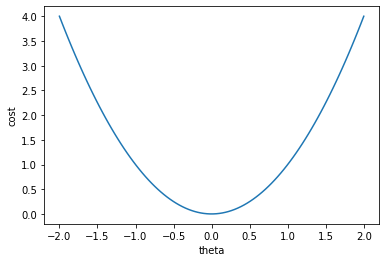

In [25]:
theta = np.linspace(-2, 2, 100)
Cost = theta**2
plt.plot(theta, Cost)
plt.ylabel("cost")
plt.xlabel("theta")
plt.show()
# if we start at a random point and find gradient at that point we can use it ot find the minimum.

In [26]:
# i did this in pytorch course and understand it pretty well so will skim through code

In [40]:
eta = 0.1 # learning rate hyper param
n_itera = 1000
m = 100

theta = np.random.randn(2,1) # random init

for itera in range(n_itera):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*grad

In [41]:
theta

array([[4.30316677],
       [3.15097718]])

In [42]:
# this is the same result the normal equation had!
# note though in this method we had to pick a learning rate and the number of iterations (hyper-param)
# to find good hyper param you can use grid search

In [43]:
# stochastic grad descent
# bounces around in a random manner but will bounce to the minimum, once at the minimum it will continue to move 
# around the minimum and not stay still on the min
# the randomness helps the algorithm jump out of local minima
# to help find the global minima better we can lower the learning rate as we go along (picking the change in rate is important)

In [48]:
n_epochs = 50
t0, t1 = 5, 50 #learning chedule hyper-params

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [50]:
theta # a good effort for only 50 epochs

array([[4.29406623],
       [3.16680071]])

In [52]:
# to do Stochastic GD with Scikit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [53]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.29709746]), array([3.16659966]))

In [54]:
# again scikit learn makes this method very quick to implement

In [55]:
# final GD method we will look at is minibatch grad decent
# at each step instead of computing grads based on the full set or one instance we use random sets of instances called
# mini-batches. This has a big performnce boost for hardware optimization of matrix operations (especially with GPU's)

In [58]:
# Polynomial Regression

# We can use the same methods as we just used but simply add more theta terms for more complex systems

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

<function matplotlib.pyplot.show(*args, **kw)>

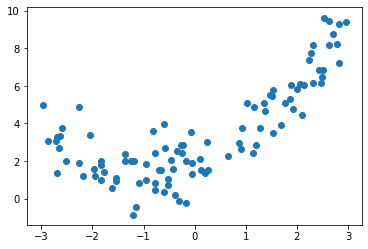

In [59]:
plt.scatter(X, y)
plt.show

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.81611243])

In [61]:
X_poly[0]

array([2.81611243, 7.93048923])

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87968693]), array([[0.97951791, 0.51752344]]))

In [63]:
# our model predicted y = (0.517...)x^2 + (0.979...)x + 1.879...